<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Hossein Anjidani

**Student ID**: 400100746

# Logistic Regression

In [1]:
## Import necessary libraries here ##
import pandas as pd
from google.colab import drive
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
# import cupy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
drive.mount('/content/drive')
path = os.path.join('/content/drive/MyDrive/UNI/Sem 6/ML/IML_CHW2/', 'Q2')

Mounted at /content/drive


**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [3]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_class
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.column_stack((1 - y_pred, y_pred))

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [4]:
df = pd.read_csv(os.path.join(path, 'Logistic_question.csv'))
# Make the Target column binary
df['Target'] = df['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the data into features and target
X = df.drop('Target', axis=1).values
y = df['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = MyLogisticRegression()
model.fit(X_train, y_train)
# print(model.weights)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# print(df)
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8750
Precision: 0.8750
Recall: 1.0000
F1-score: 0.9333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

The evaluation metrics used in the provided code are Accuracy, Precision, Recall, and F1 Score. These metrics are commonly used for assessing the performance of classification models, including Logistic Regression.


`Accuracy`: This is the proportion of correct predictions out of the total number of predictions. It is the most commonly used metric for evaluating classification models. However, it can be misleading when classes are imbalanced.
Accuracy is useful when the dataset is balanced, and the cost of false positives and false negatives is similar. It is a good overall measure of model performance but may not be the best choice in specific situations where false positives or false negatives have different costs.


`Precision`: This metric measures the proportion of true positive predictions out of all positive predictions. It is useful when the cost of false positives is high, such as in spam detection, where incorrectly marking a legitimate email as spam is undesirable.
Precision is useful when the dataset has a high imbalance in favor of the negative class, and the cost of false positives is high. It is a good measure of the model's ability to correctly identify positive instances.


`Recall` (Sensitivity or True Positive Rate): This metric measures the proportion of true positive predictions out of all actual positive instances. It is useful when the cost of false negatives is high, such as in medical diagnosis, where missing a positive case can have severe consequences.
Recall is useful when the dataset has a high imbalance in favor of the positive class, and the cost of false negatives is high. It is a good measure of the model's ability to correctly identify positive instances.


`F1 Score`: This metric is the harmonic mean of Precision and Recall, balancing both metrics. It is useful when both false positives and false negatives have similar costs or when you want to find a balance between Precision and Recall.
F1 Score is useful when the dataset is imbalanced, and you want to balance the trade-off between Precision and Recall. It is a good overall measure of model performance when both false positives and false negatives have similar costs.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [5]:
# Load the dataset
df = pd.read_csv(os.path.join(path, 'Logistic_question.csv'))

# Make the Target column binary
df['Target'] = df['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# Split the data into features and target
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = MyLogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8750
Precision: 0.8750
Recall: 1.0000
F1-score: 0.9333


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

When comparing a custom Logistic Regression function with the built-in function from Scikit-learn, there are several aspects to consider regarding performance and parameters.


Performance:
* Custom Function vs. Built-in Function:
* * The custom function may offer more flexibility in terms of customization and understanding the inner workings of the model.
* * The built-in function from Scikit-learn is optimized for performance and efficiency, making it suitable for large datasets and production environments.


Parameters:
* Custom Function:
* * In the custom function, parameters like learning rate, number of iterations, and regularization strength can be adjusted based on specific requirements.
* * The custom function may lack some advanced features and optimizations present in the built-in function.


* Built-in Function (Scikit-learn):
* * Parameters of the built-in Logistic Regression function in Scikit-learn include:
* * * `penalty`: Specifies the norm used in the penalization (L1 or L2).
* * * `C`: Inverse of regularization strength; smaller values specify stronger regularization.
* * * `solver`: Algorithm to use in the optimization problem (e.g., 'liblinear', 'lbfgs', 'sag', 'saga').
* * * `max_iter`: Maximum number of iterations taken for the solvers to converge.
* * * `class_weight`: Weights associated with classes in the form {class_label: weight}.
Impact on Model's Performance:
* Parameter Tuning:
* * Adjusting parameters like regularization strength (C) and solver choice can significantly impact the model's performance.
* * Proper parameter tuning can help prevent overfitting and improve generalization.
* Built-in Function Efficiency:
* * The built-in function is optimized for performance and handles various aspects like parallelization and memory management efficiently.
* * It incorporates best practices in model training and evaluation, leading to reliable results.

In summary, while a custom Logistic Regression function provides flexibility and understanding, the built-in function from Scikit-learn offers optimized performance, advanced features, and efficient parameter tuning capabilities, making it a preferred choice for practical applications and large-scale datasets.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [6]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss(self, y_pred, y_true):
        return -np.mean(y_true * np.log(y_pred))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - np.eye(num_classes)[y]))
            db = (1 / num_samples) * np.sum(y_pred - np.eye(num_classes)[y], axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        y_pred_class = np.argmax(y_pred, axis=1)
        return y_pred_class

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [7]:
# Load the dataset
df = pd.read_csv(os.path.join(path, 'Logistic_question.csv'))

# Vary the number of levels for quantization (2 to 10)
for num_levels in range(2, 11):
    df[f'Target_{num_levels}'] = pd.qcut(df['Target'], num_levels, labels=False)

    # Split the data into features and target
    X = df.drop(['Target', f'Target_{num_levels}'], axis=1).values
    y = df[f'Target_{num_levels}'].values

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data using X_train data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the evaluation metrics for each level of quantization
    print(f"Quantization Levels: {num_levels}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

Quantization Levels: 2
Accuracy: 0.9375
Precision: 0.9379
Recall: 0.9375
F1-score: 0.9375

Quantization Levels: 3
Accuracy: 0.8500
Precision: 0.8625
Recall: 0.8500
F1-score: 0.8349

Quantization Levels: 4
Accuracy: 0.8625
Precision: 0.8658
Recall: 0.8625
F1-score: 0.8627

Quantization Levels: 5
Accuracy: 0.5625
Precision: 0.4909
Recall: 0.5625
F1-score: 0.5217

Quantization Levels: 6
Accuracy: 0.7875
Precision: 0.7959
Recall: 0.7875
F1-score: 0.7843

Quantization Levels: 7
Accuracy: 0.5750
Precision: 0.5226
Recall: 0.5750
F1-score: 0.5347



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Quantization Levels: 8
Accuracy: 0.6625
Precision: 0.6883
Recall: 0.6625
F1-score: 0.6378

Quantization Levels: 9
Accuracy: 0.5875
Precision: 0.5246
Recall: 0.5875
F1-score: 0.5288

Quantization Levels: 10
Accuracy: 0.5500
Precision: 0.5933
Recall: 0.5500
F1-score: 0.5294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [8]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Then use this code to automatically download the dataset into Colab.

In [9]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 114MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [10]:
# Your code goes here!
df = pd.read_csv('adult.csv', na_values='?')
print(df.isnull().sum().sum())
print(df)

6465
       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18           NaN  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-f

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
1. Deletion:
* Listwise deletion: Remove entire rows that have any missing values. This is suitable when the percentage of missing data is low and the data is Missing Completely At Random (MCAR).

* Pairwise deletion: Use all available data for each analysis, even if some values are missing. This can be used when the data is MCAR, but may result in inconsistent statistics.

* Dropping variables: If a large proportion of the data is missing for a particular feature, it may be best to simply drop that variable from the analysis. This is appropriate when the missing data is not crucial for the analysis.

2. Imputation:
* Mean/Median imputation: Replace missing values with the mean or median of the non-missing values for that feature. This is simple but can introduce bias if the data is not MCAR.

* Regression imputation: Use a regression model to predict the missing values based on the other features. This works well when the data is Missing At Random (MAR).

* Iterative imputation: Use an iterative algorithm like Expectation-Maximization (EM) to impute missing values. This can handle more complex patterns of missing data.

To decide which method to use for the Adult Income dataset:
* First, examine the pattern of missing data. If it is MCAR, then deletion methods like listwise or pairwise deletion may be appropriate, as long as the percentage of missing data is not too high.

* If the missing data is MAR, then imputation methods like regression imputation may work well.

* If the missing data is Not Missing At Random (NMAR), more advanced imputation techniques like iterative imputation may be needed to model the missing data mechanism.

* Consider the percentage of missing data - if it is very high (e.g., over 20%), deletion methods may result in too much data loss, and imputation may be preferable.

* Evaluate the performance of different methods on a validation set to determine the most suitable approach for this dataset.

The key is to understand the pattern of missing data and choose the appropriate method that balances bias, efficiency, and the specific requirements of the analysis.

**Task:** Handle null entries using your best method.

In [11]:
df = df.dropna()

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [12]:
def extract_categorical_features(df, target_column):
    """
    Extracts the categorical features from the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    target_column (str): The name of the target column.

    Returns:
    list: A list of categorical feature names.
    """
    categorical_features = []
    for column in df.columns:
        if column != target_column and df[column].dtype == 'object':
            unique_values = df[column].unique()
            # if len(unique_values) <= 20 or df[column].:
            categorical_features.append(column)
    return categorical_features

In [13]:
# print(df)
# Convert categorical features to numerical values
categorical_features = extract_categorical_features(df, 'income')
print(categorical_features)
for feature in categorical_features:
    df[feature] = df[feature].astype('category').cat.codes

# Split the dataset into features and target
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
print(df)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25          2  226802          1                7               4   
1       38          2   89814         11                9               2   
2       28          1  336951          7               12               2   
3       44          2  160323         15               10               2   
5       34          2  198693          0                6               4   
...    ...        ...     ...        ...              ...             ...   
48837   27          2  257302          7               12               2   
48838   40          2  154374         11                9               2   
48839   58          2  151910         11                9               6   
48840   22          2  201490         11                9               4   
48841   52          3  287927         11  

In [14]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model and perform GridSearchCV
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the train and test accuracy
print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", grid_search.best_score_)
print("Test Accuracy:", grid_search.score(X_test, y_test))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Train Accuracy: 0.8201894963484048
Test Accuracy: 0.8208955223880597


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split X_train into 10 parts
X_train_parts = np.array_split(X_train, 10)
y_train_parts = np.array_split(y_train, 10)

# Train 10 separate Logistic Regression models
models = []
for i in range(10):
    model = MyLogisticRegression()
    model.fit(X_train_parts[i], y_train_parts[i])
    models.append(model)

# Ensemble methods
def ensemble_majority_vote(X_test):
    y_pred_list = []
    for model in models:
        y_pred_list.append(model.predict(X_test))
    y_pred_ensemble = np.array([np.argmax(np.bincount(y_pred_col)) for y_pred_col in zip(*y_pred_list)])
    return y_pred_ensemble

def ensemble_average_probability(X_test):
    y_pred_proba_list = []
    for model in models:
        y_pred_proba_list.append(model.predict_proba(X_test))
    y_pred_proba_ensemble = np.mean(y_pred_proba_list, axis=0)
    y_pred_ensemble = [1 if prob > 0.5 else 0 for prob in y_pred_proba_ensemble[:, 1]]
    return y_pred_ensemble

def ensemble_weighted_average(X_test):
    y_pred_proba_list = []
    for model in models:
        y_pred_proba_list.append(model.predict_proba(X_test))
    weights = [1 / (i + 1) for i in range(10)]
    y_pred_proba_ensemble = np.average(y_pred_proba_list, axis=0, weights=weights)
    y_pred_ensemble = [1 if prob > 0.5 else 0 for prob in y_pred_proba_ensemble[:, 1]]
    return y_pred_ensemble

# Evaluate the ensemble methods
print("Majority Vote Accuracy:", accuracy_score(y_test, ensemble_majority_vote(X_test)))
print("Average Probability Accuracy:", accuracy_score(y_test, ensemble_average_probability(X_test)))
print("Weighted Average Accuracy:", accuracy_score(y_test, ensemble_weighted_average(X_test)))


Majority Vote Accuracy: 0.8134881149806523
Average Probability Accuracy: 0.8139303482587065
Weighted Average Accuracy: 0.8137092316196793


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
In this code, we first split the X_train data into 10 parts and train 10 separate Logistic Regression models on these parts. Then, we implement three different ensemble methods:
1. Majority Vote: The final prediction is the class that receives the most votes from the 10 models.
2. Average Probability: The final prediction is based on the average probability of the 10 models.
3. Weighted Average: The final prediction is based on the weighted average probability of the 10 models, with the weights inversely proportional to the model index (i.e., the first model has the highest weight, and the last model has the lowest weight).
Finally, we evaluate the test accuracy for each ensemble method and print the results.

Note that the best ensemble method may vary depending on the specific dataset and the performance of the individual models. The answer is not general, and you may need to experiment with different ensemble methods to find the one that works best for your problem.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Number of parts (i): 2, Train Accuracy: 0.8123, Test Accuracy: 0.8142
Number of parts (i): 3, Train Accuracy: 0.8124, Test Accuracy: 0.8146
Number of parts (i): 4, Train Accuracy: 0.8121, Test Accuracy: 0.8144
Number of parts (i): 5, Train Accuracy: 0.8124, Test Accuracy: 0.8143
Number of parts (i): 6, Train Accuracy: 0.8121, Test Accuracy: 0.8147
Number of parts (i): 7, Train Accuracy: 0.8124, Test Accuracy: 0.8140
Number of parts (i): 8, Train Accuracy: 0.8124, Test Accuracy: 0.8138
Number of parts (i): 9, Train Accuracy: 0.8121, Test Accuracy: 0.8135
Number of parts (i): 10, Train Accuracy: 0.8121, Test Accuracy: 0.8137
Number of parts (i): 11, Train Accuracy: 0.8118, Test Accuracy: 0.8134
Number of parts (i): 12, Train Accuracy: 0.8117, Test Accuracy: 0.8136
Number of parts (i): 13, Train Accuracy: 0.8113, Test Accuracy: 0.8140
Number of parts (i): 14, Train Accuracy: 0.8113, Test Accuracy: 0.8138
Number of parts (i): 15, Train Accuracy: 0.8116, Test Accuracy: 0.8137
Number of part

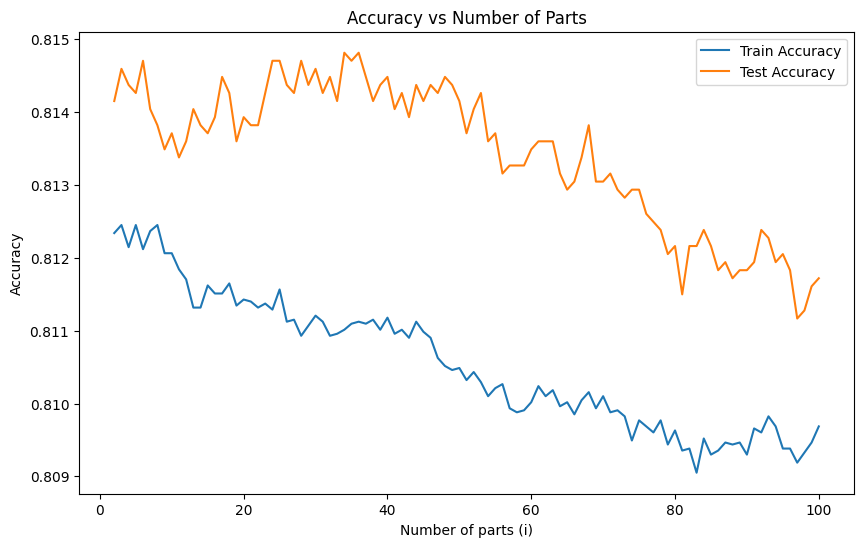

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store the results
i_values = list(range(2, 101))
train_accuracies = []
test_accuracies = []

# Iterate over the number of parts (i)
for i in i_values:
    # Split X_train into i parts
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(y_train, i)

    # Train i separate Logistic Regression models
    models = []
    for j in range(i):
        model = MyLogisticRegression()
        model.fit(X_train_parts[j], y_train_parts[j])
        models.append(model)

    # Ensemble method: Weighted Average
    def ensemble_weighted_average(X_test):
        y_pred_proba_list = []
        for model in models:
            y_pred_proba_list.append(model.predict_proba(X_test))
        weights = [1 / (k + 1) for k in range(i)]
        y_pred_proba_ensemble = np.average(y_pred_proba_list, axis=0, weights=weights)
        y_pred_ensemble = [1 if prob > 0.5 else 0 for prob in y_pred_proba_ensemble[:, 1]]
        return y_pred_ensemble

    # Evaluate the ensemble method
    y_train_pred = ensemble_weighted_average(X_train)
    y_test_pred = ensemble_weighted_average(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f"Number of parts (i): {i}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Find the best model
best_i = i_values[np.argmax(test_accuracies)]
best_train_accuracy = train_accuracies[np.argmax(test_accuracies)]
best_test_accuracy = test_accuracies[np.argmax(test_accuracies)]

print(f"Best number of parts (i): {best_i}, Best Train Accuracy: {best_train_accuracy:.4f}, Best Test Accuracy: {best_test_accuracy:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(i_values, train_accuracies, label='Train Accuracy')
plt.plot(i_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of parts (i)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Parts')
plt.legend()
plt.show()

**Question:** Analyze the results.

**Your Answer:** small training part make the accuracy worse.